In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
bcw= pd.read_csv('breast-cancer-wisconsin.csv',header=None)
bcw.columns=['Sample','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
             'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
bcw.head()

,Sample,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


###### Performing EDA

In [3]:
# checking shape of data
bcw.shape

(699, 11)

In [4]:
# checking data type
bcw.dtypes

Sample                          int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
#checking unique value in each row
bcw.nunique()

Sample                         645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     11
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [6]:
bcw=bcw.drop(['Sample'], axis=1)

In [7]:
# replacing all '?' values with nan values in train and test data
bcw = bcw.replace('?', np.nan)

In [8]:
# checking null value
bcw.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
bcw['Bare Nuclei'].fillna(bcw['Bare Nuclei'].mode()[0], inplace=True)

In [10]:
bcw['Bare Nuclei']=bcw['Bare Nuclei'].astype(int)

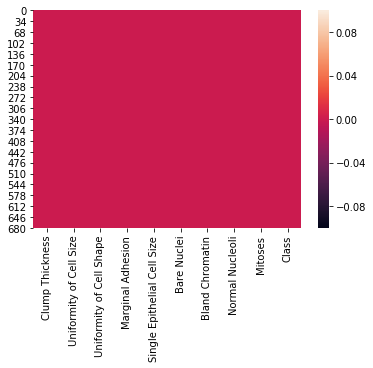

In [11]:
# heatmap of null value
sns.heatmap(bcw.isnull())

In [12]:
# checking the data description
bcw.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
# corelation between coloums
bcw.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


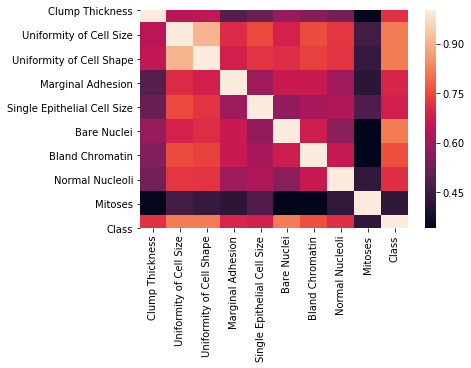

In [14]:
# heat map of corelation
sns.heatmap(bcw.corr())

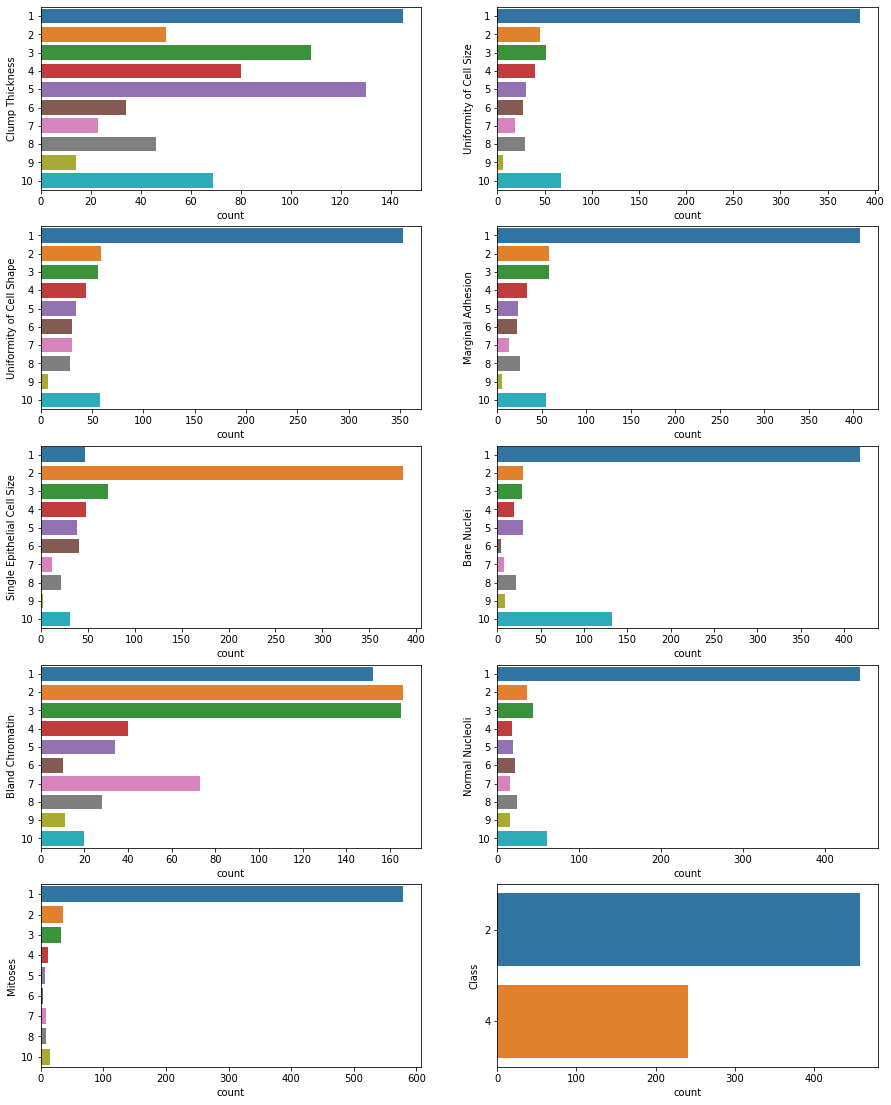

In [15]:
#creating barplot of colums to check the count of indivisual value
figure(num=None,figsize=(15,80))
for column_index,col in enumerate(bcw.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(y=bcw[col],data=bcw)

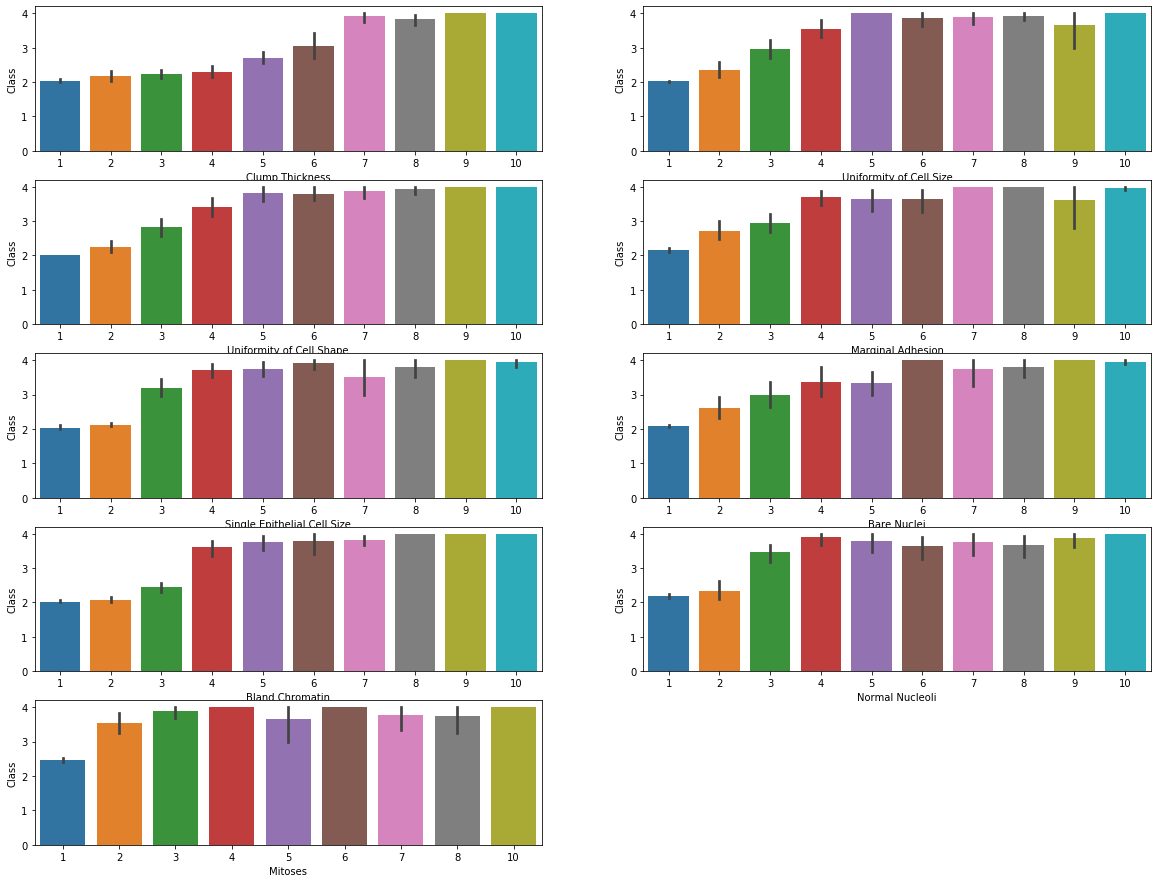

In [16]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(bcw.columns):
    if column == 'Class':
        continue
    plt.subplot(8, 2, column_index+1)
    
    sns.barplot(y='Class', x=column, data=bcw)

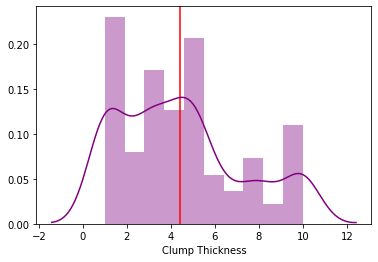

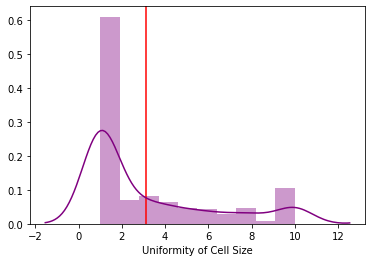

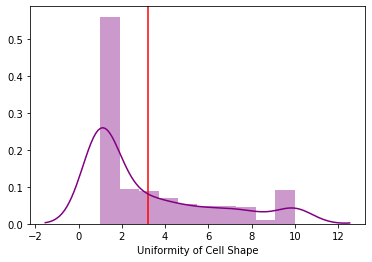

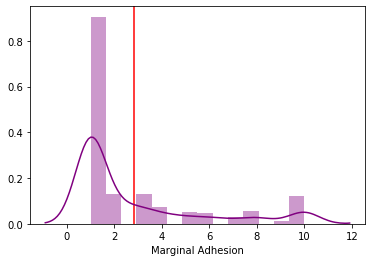

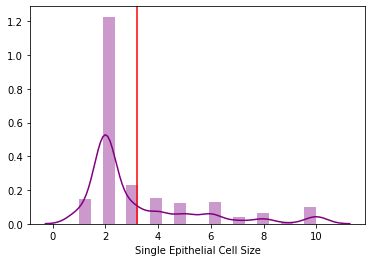

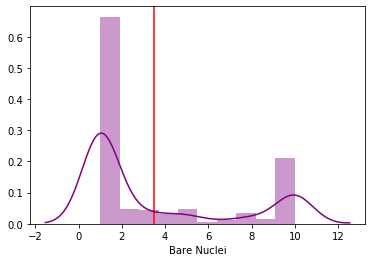

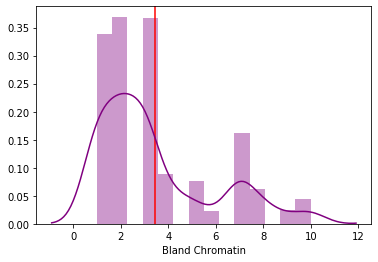

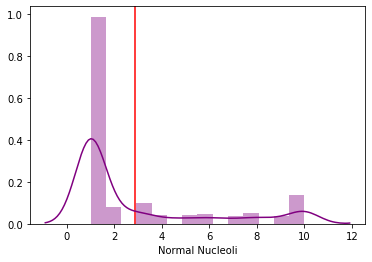

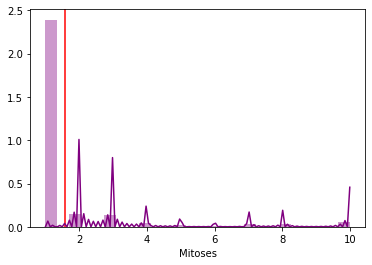

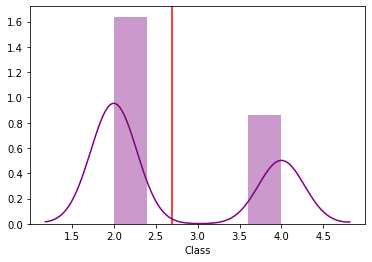

In [17]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(bcw):
    plt.figure(i)
    plt.axvline(bcw[col].mean(),color = 'r')
    sns.distplot(bcw[col],color='purple')

Clump Thickness                   AxesSubplot(0.125,0.772143;0.227941x0.107857)
Uniformity of Cell Size        AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Uniformity of Cell Shape       AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Marginal Adhesion                 AxesSubplot(0.125,0.642714;0.227941x0.107857)
Single Epithelial Cell Size    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Bare Nuclei                    AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Bland Chromatin                   AxesSubplot(0.125,0.513286;0.227941x0.107857)
Normal Nucleoli                AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Mitoses                        AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Class                             AxesSubplot(0.125,0.383857;0.227941x0.107857)
dtype: object

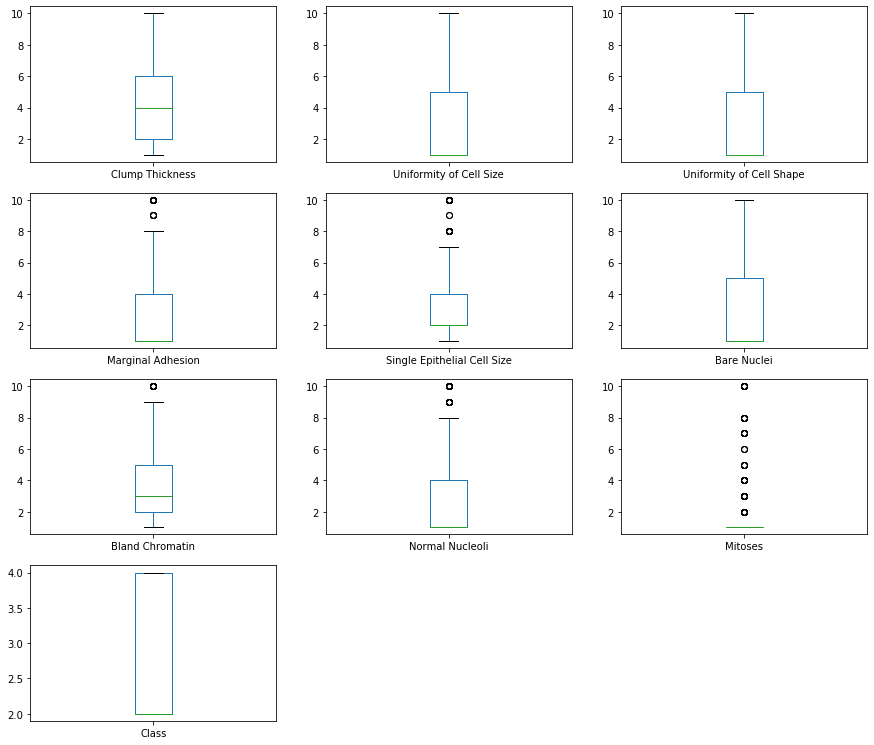

In [18]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
bcw.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

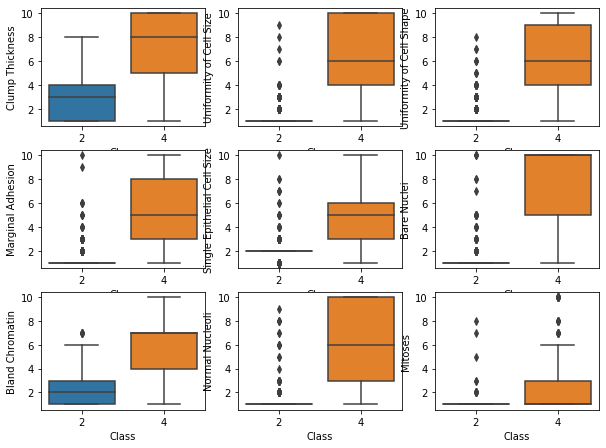

In [19]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires Loan_Status wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(bcw.columns):
    if column == 'Class':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='Class', y=column, data=bcw)

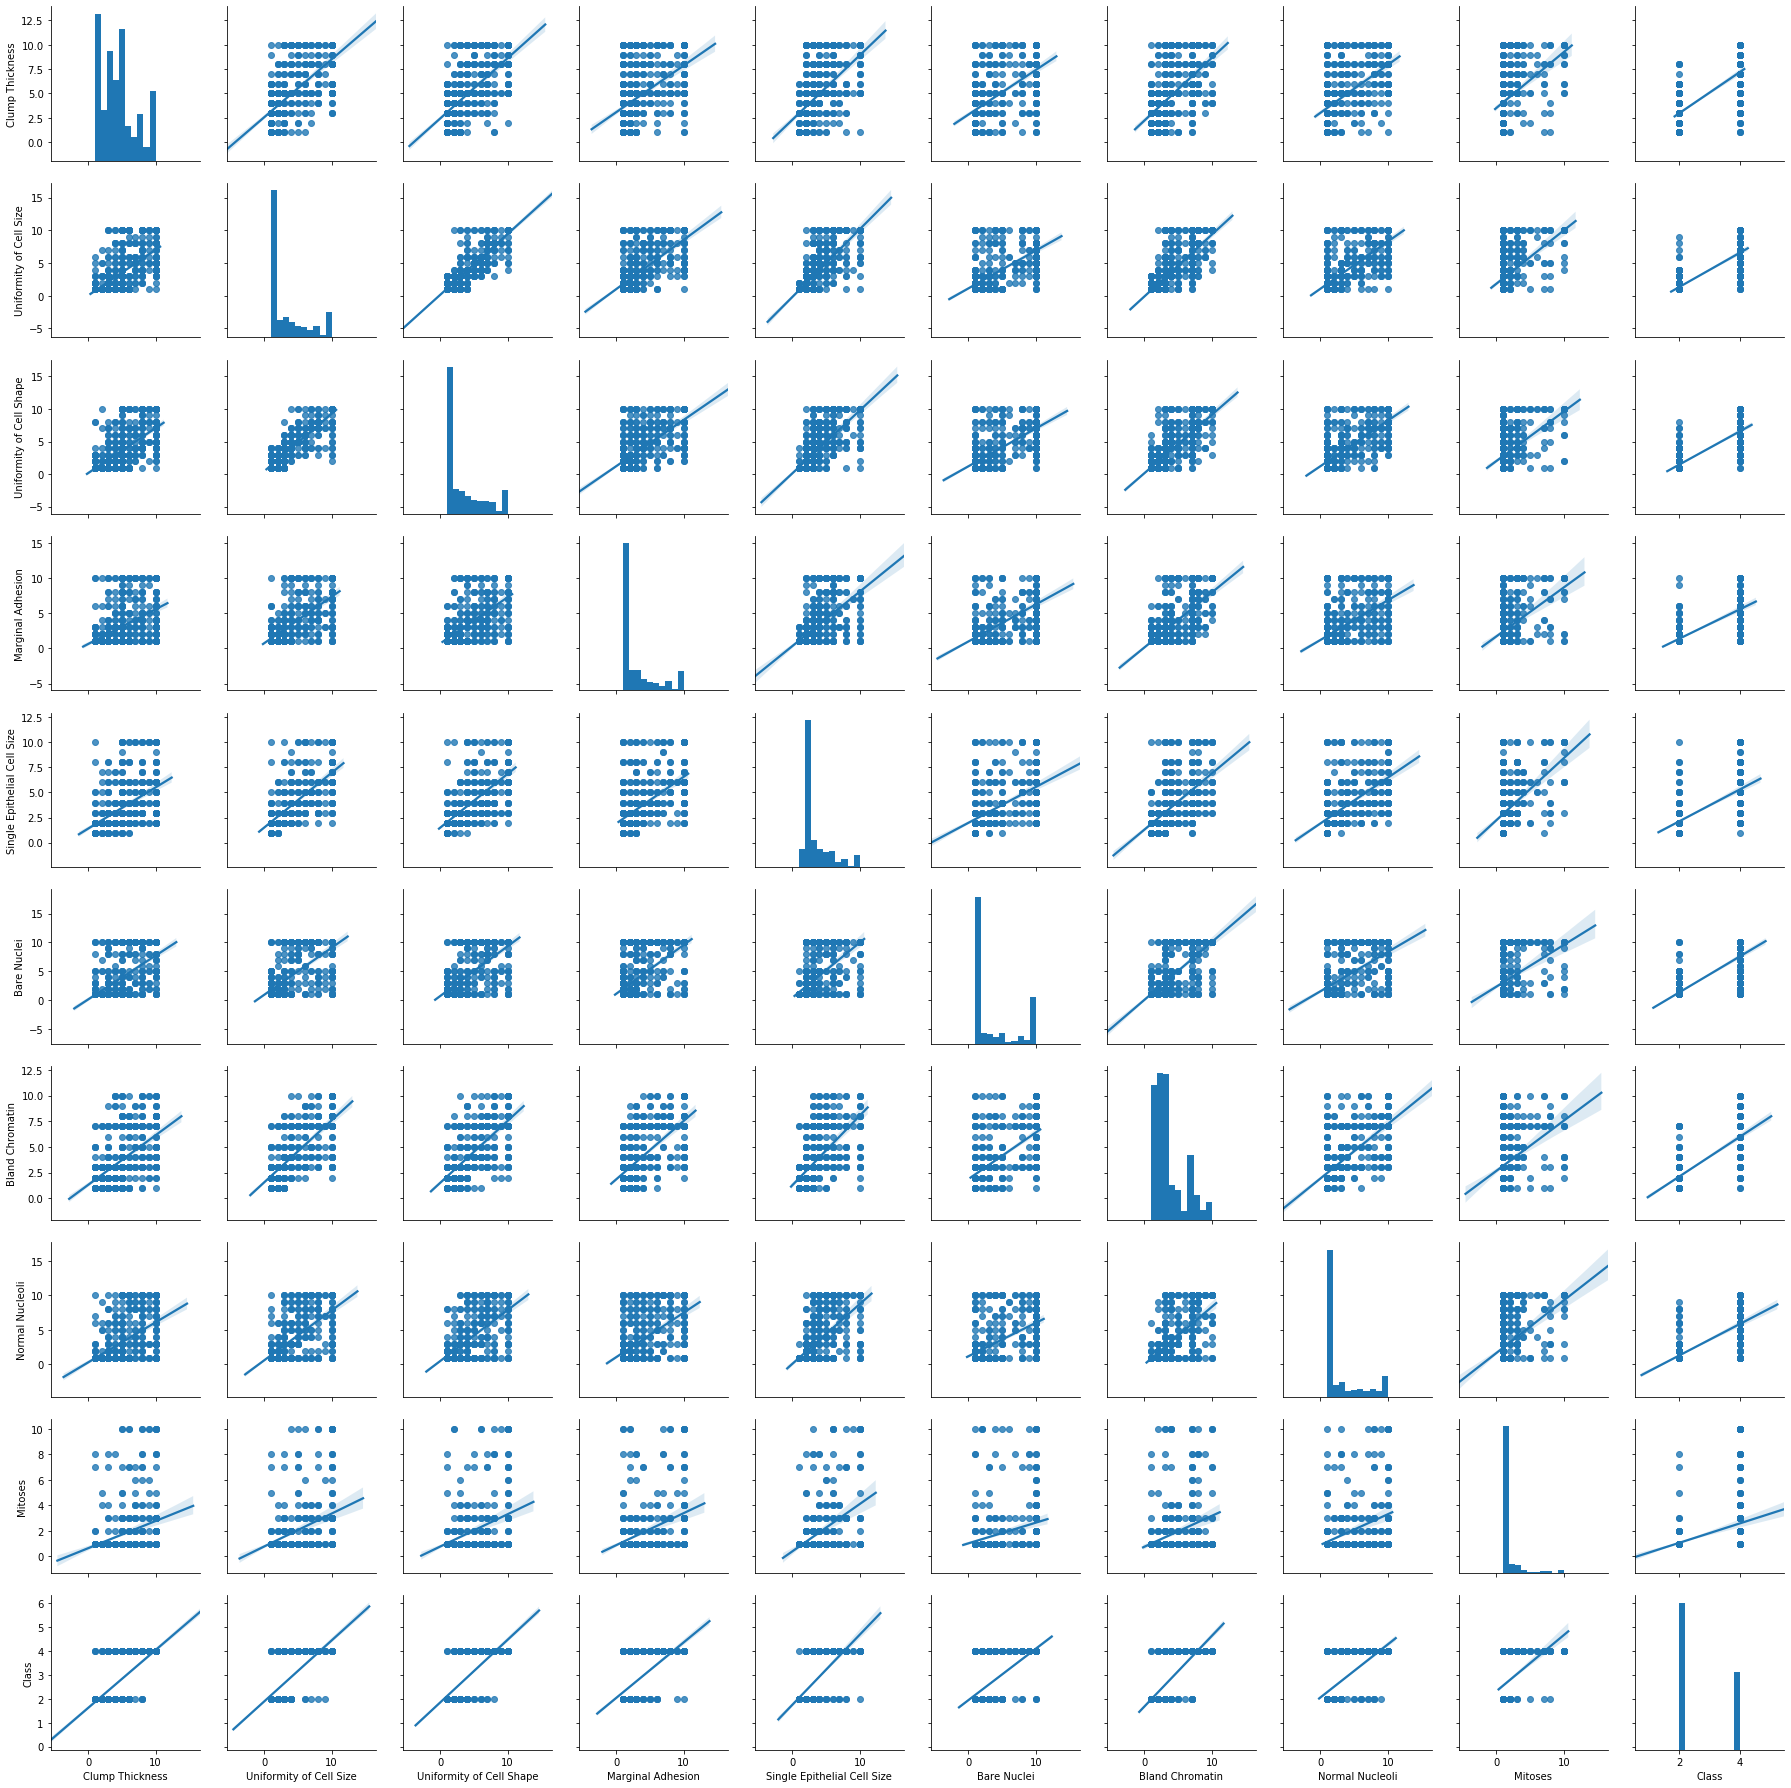

In [20]:
# pair plot to see the scatter of data
sns.pairplot(bcw,kind='reg')

In [21]:
#checking skewness
bcw.skew()

Clump Thickness                0.592859
Uniformity of Cell Size        1.233137
Uniformity of Cell Shape       1.161859
Marginal Adhesion              1.524468
Single Epithelial Cell Size    1.712172
Bare Nuclei                    1.025347
Bland Chromatin                1.099969
Normal Nucleoli                1.422261
Mitoses                        3.560658
Class                          0.654564
dtype: float64

There is no need to remove skewness as well as outlires since all the columns are of catagorical variables

In [22]:
#Label Encoding Loan_Status variable
le=LabelEncoder()
bcw['Class']=le.fit_transform(bcw['Class'])
bcw.sample(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
90,1,1,1,1,2,1,3,1,1,0
165,4,1,1,1,2,2,3,2,1,0
146,3,4,5,2,6,8,4,1,1,1
319,4,4,4,4,6,5,7,3,1,0
635,3,1,4,1,2,1,1,1,1,0


In [23]:
# dividing dataset into input values 'x' and output value 'y'
x = bcw.drop(['Class'],axis=1)
print('x dataset\n',x.head(),'\n')
y=bcw['Class']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2           

In [24]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

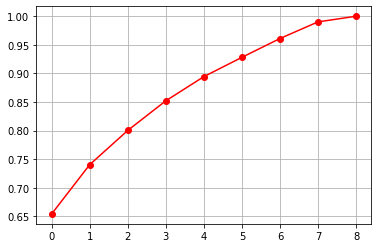

In [25]:
# using pca to find out the variance ratio for dimensionality-reduction
pca=PCA()
train_x1=pca.fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

we will not use pca for dimensionality-reduction since this does'nt have much effect

###### Bulding and comparing multipe classification model, to find out the best model

In [26]:
#creating models array with all the model
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [27]:
# loop to find out the maximum ayuray of all the model in models arrac along the range of random state
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [28]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
0,SVC,1.000000,38
1,GaussianNB,1.000000,71
2,SGDClassifier,1.000000,71
3,LogisticRegression,1.000000,38
8,KNeighborsClassifier,1.000000,38
9,QuadraticDiscriminantAnalysis,1.000000,71
6,LinearDiscriminantAnalysis,0.992857,57
5,GradientBoostingClassifier,0.985714,37
7,RandomForestClassifier,0.985714,50
4,DecisionTreeClassifier,0.971429,18


###### Conclusion
On basis of accuracy SVC model is performing the best with maximum accuracy score

In [29]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [30]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
2,SGDClassifier,0.965714,0.026496
0,SVC,0.965694,0.030088
3,LogisticRegression,0.964286,0.034553
8,KNeighborsClassifier,0.962836,0.039988
1,GaussianNB,0.959959,0.026937
6,LinearDiscriminantAnalysis,0.958571,0.056587
5,GradientBoostingClassifier,0.954286,0.050224
7,RandomForestClassifier,0.954265,0.042747
9,QuadraticDiscriminantAnalysis,0.951387,0.030746
4,DecisionTreeClassifier,0.924244,0.041382


###### Conclusion
On basis of Crossval score for accuracy SGDClassifier model is performing best, closely follow by svc model

###### On basis of our compression of accuracy and Cross val score i choose SVC model since it performing best on given data

In [31]:
#using grid search to improve model..
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
mod=SVC()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [32]:
grid_result.best_score_

0.9685264663805436

In [33]:
grid_result.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model score is: 0.962432915921288 

Accuracy score of model is :  1.0 

The mean of cross_val_score for themodel is: 0.9685507246376812 

Precision score of model is : 1.0 

Recall score of model is : 1.0 

Log loss score of model is : 9.992007221626415e-16 

F1_score score of model is : 1.0 

Confusion matrix for the model is : 
 [[92  0]
 [ 0 48]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        48

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140
 



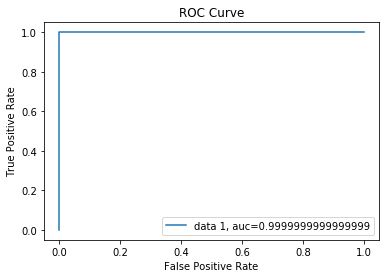

In [34]:
#final classification model
svc= SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=38,stratify=y,shuffle=True)
kfoldr =KFold(n_splits=10,random_state=5)

svc.fit(train_x,train_y)
pred=svc.predict(test_x)
predict_proba = svc.predict_proba(test_x)[::,1]
score=cross_val_score(svc,x,y,cv=kfoldr,scoring='accuracy').mean()

print('Model score is:',svc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')

print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')

print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 14 Breast Cancer Wisconsin.csv')

In [36]:
# saving the model using pickle.
joblib.dump(svc,'svc_Project 14 Breast Cancer Wisconsin.pkl')

['svc_Project 14 Breast Cancer Wisconsin.pkl']